<a href="https://colab.research.google.com/github/Elwing-Chou/MCDL0519/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# tensorflow 2
# 1.keras直接被包入tensorflow裡面  
# 2.現在不用安裝特殊版本的tensorflow就可以使用gpu(還是要安裝cuda(driver)和cudnn(加速器))
# 我在線上課程都是 from keras import ... -> from tensorflow.keras import ...
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [15]:
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
# 0(黑色) --> 255(純白)
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


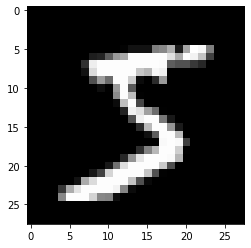

In [16]:
# matplotlib: 作圖基礎函式庫
# https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
# 你可以自己決定0是什麼, 255是什麼, 如果要反過來_r, e.g. winter_r
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [17]:
from tensorflow.keras.models import Sequential
# Dense: 全連接層
from tensorflow.keras.layers import Dense
layers = [
    Dense(128, activation="relu", input_dim=784),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="mse", metrics=["accuracy"])

In [19]:
# 輸入: 攤平, 並且把他normalize到0~1(tensorflow規定輸入-1~1, 0~1)
x_train_r = x_train.reshape(60000, 784) / 255.0
x_test_r = x_test.reshape(10000, 784) / 255.0

In [20]:
# 輸出: 10個機率
# 5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] [0的機率, 1的機率, 2的機率....]
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0], y_train_cat[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# epochs: 不要太多輪, 因為太多輪, 你會把所有東西都學(過擬合)
# 我會割出一份(不給學), 驗證現在的模型表現如何
# train(訓練)[60000*90%] validate(驗證)(調整模型參數)[60000*10%] test(最後考試)[10000]
# 你發覺validate資料, loss平滑下來了, 就該停了
model.fit(x_train_r, 
     y_train_cat,
     epochs=10,
     validation_split=0.1)

In [22]:
# test最後考試
model.evaluate(x_test_r, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0035 - accuracy: 0.9786


[0.003477319609373808, 0.978600025177002]

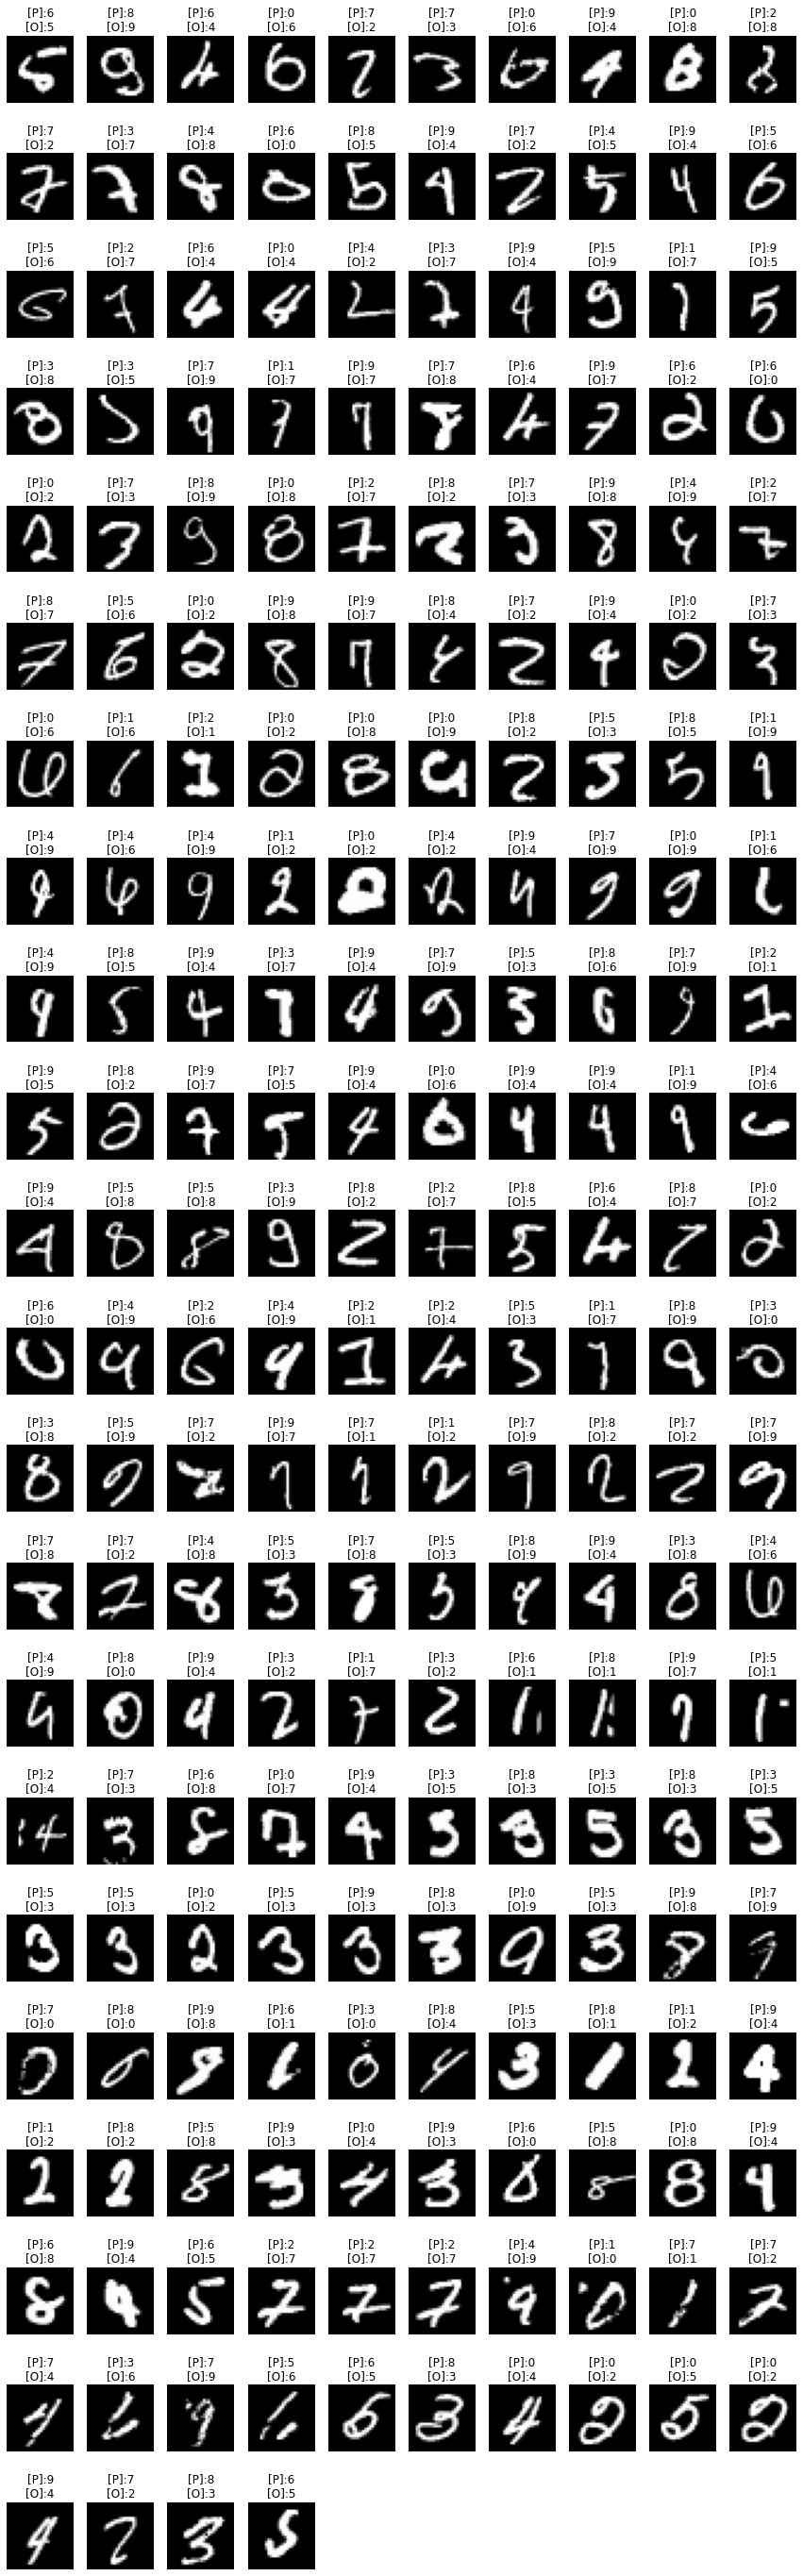

In [24]:
# 把預測錯誤的東西全部印出來
import numpy as np
pre = model.predict(x_test_r).argmax(axis=1)
idx = np.nonzero(pre != y_test)[0]
pre_false_pre = pre[idx]
pre_false_label = y_test[idx]
pre_false_img = x_test[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(15, 50))

for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(pre_false_pre[i], pre_false_label[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i], cmap="gray")